<a href="https://colab.research.google.com/github/FranciniSantana/EstatisticaDescritiva/blob/main/Desafio_Ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Ifood - Curso Estatística do Básico ao Avançado | Renata Biaggi

In [1]:
#importar as bibliotecas de trabalho

import pandas as pd
import numpy as np
import plotly.express as pl
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import variation, skew, kurtosis



In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Estudos/EBA/Bases/mkt_data.csv')

Mounted at /content/drive


In [4]:
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


## Análise Exploratória

* Quantos dados temos? Linhas e colunas 
* Quais são as colunas numéricas?
* Temos duplicados na nossa base? Se tivermos, retire-os 
* Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles? 
* Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas? 


In [5]:
df.shape

(2205, 44)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [7]:
df.duplicated().sum() #somei os valores duplicados

0

In [8]:
df.isnull().sum() # quantidade de valores nulos por coluna

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

In [9]:
df[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow','education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']].count() # valores absolutos preenchidos

marital_Divorced         230
marital_Married          854
marital_Single           477
marital_Together         568
marital_Widow             76
education_2n Cycle       198
education_Basic           54
education_Graduation    1113
education_Master         364
education_PhD            476
dtype: int64

In [10]:
df[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow','education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']].count() / len(df) * 100 # % de dados preenchidos

marital_Divorced        10.430839
marital_Married         38.730159
marital_Single          21.632653
marital_Together        25.759637
marital_Widow            3.446712
education_2n Cycle       8.979592
education_Basic          2.448980
education_Graduation    50.476190
education_Master        16.507937
education_PhD           21.587302
dtype: float64

Considerando que as colunas possuem uma alta quantidade de valores nulos, no momento não iremos fazer nada com elas. Apenas não iremos utilizar por enquanto.

## **Perfil de Clientes:**

* **Qual é o maior salário encontrado na nossa base?**



In [11]:
df['Income'].max()

113734.0

* **Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem?** 



Para analisar essa pergunta vamos utilizar as medidas descritivas como: min, máx, desvio padrão e quartis que possuem na função describe:

In [13]:
df['Income'].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

Vamos avaiar o coeficiente de variação para entender o % que varia os salários em torno da média

In [77]:
CoefVariacao = variation(df['Income']).round(decimals=2)*100
CoefVariacao

40.0

Vamos verificar graficamente como esses valores estão distribuídos:

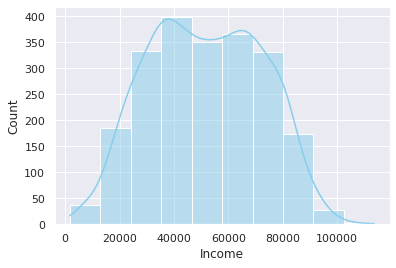

In [17]:
sns.set(style="darkgrid")
sns.histplot(data=df, x='Income', kde=True, color="skyblue", bins = 10)
plt.show()


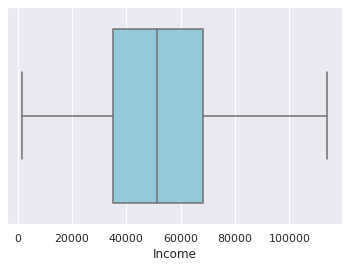

In [19]:
sns.set(style="darkgrid")
sns.boxplot(data=df, x="Income", color="skyblue")
plt.show() #imprimir sem informações abaixo

* **Nossos clientes tem níveis de educação maiores ou menores?** 

Vamos criar uma tabela de frequência para os níveis de educação considerando que nossos dados são do tipo categóricos ordinal.

In [71]:
level_count_education = df.groupby('education_level',sort=False).education_level.count() #criando campo de contagem


In [72]:
level_percent_education = df.groupby('education_level',sort=False).education_level.count() / len(df.education_level) *100 # criando campo de porcentual

In [75]:
ed_level = pd.DataFrame(
    {'Count': level_count_education,
      'Porcent': level_percent_education
    }
).reset_index(drop=False) # criando tabela de frequência

ed_level #mostrando os valores da tabela

,education_level,Count,Porcent
0,Graduation,1113,50.476190
1,PhD,476,21.587302
2,Master,364,16.507937
3,Basic,54,2.448980
4,2n Cycle,198,8.979592


Vamos avaliar graficamente qual o nível de educação dos nossos clientes

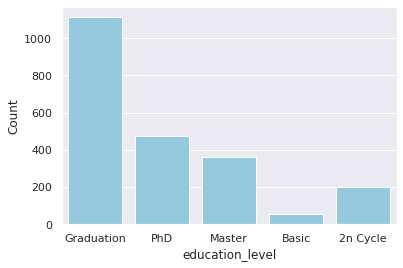

In [78]:
sns.barplot(data=ed_level, x='education_level' ,y='Count',color ='skyblue')
plt.show() #representação de frequência para variáveis categóricas

Vamos classificar o nível de educação em Alto e Baixo e usar um gráfico de pizza.

In [103]:
ed_level['Classificação'] = np.where((ed_level['education_level'] == 'Basic') | (ed_level['education_level'] =='2n Cycle'), 'Baixo','Alto') #adicionei uma nova coluna classificando| Função similar IF excel/ Case When/SQL
ed_level

,education_level,Count,Porcent,Classificação
0,Graduation,1113,50.476190,Alto
1,PhD,476,21.587302,Alto
2,Master,364,16.507937,Alto
3,Basic,54,2.448980,Baixo
4,2n Cycle,198,8.979592,Baixo


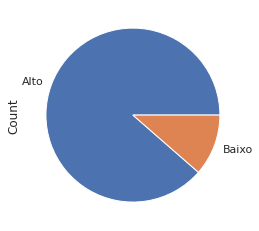

In [128]:
ed_level.groupby('Classificação').Count.sum().plot.pie()
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: ignored

* **Quantos clientes temos em cada estado civil?**

Vamos criar uma tabela de frequência para o estado civil

In [26]:
ms_a= df.groupby('marital_status').marital_status.count() #valores absolutos
ms_a

marital_status
Divorced    230
Married     854
Single      477
Together    568
Widow        76
Name: marital_status, dtype: int64

In [27]:
type(ms_a)


pandas.core.series.Series

In [28]:
ms_r = df.groupby('marital_status').marital_status.count()/len(df.marital_status)*100 #valor/proporcional ou relativo
ms_r 

marital_status
Divorced    10.430839
Married     38.730159
Single      21.632653
Together    25.759637
Widow        3.446712
Name: marital_status, dtype: float64

In [83]:
l = pd.DataFrame({'Count': ms_a,
                  'Porcent': ms_r}


                  ).reset_index(drop=False).sort_values('Count',ascending=False) # transformar em uma tabela e ordernar do valor maior para o menor
l

,marital_status,Count,Porcent
1,Married,854,38.730159
3,Together,568,25.759637
2,Single,477,21.632653
0,Divorced,230,10.430839
4,Widow,76,3.446712


Vamos avaliar graficamente o estado civil dos nossos clientes

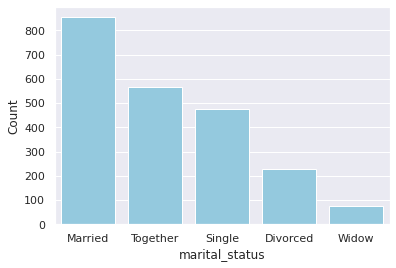

In [84]:
sns.barplot(data = l, x='marital_status',y= 'Count', orient = 'v',color ='skyblue')
plt.show()

## **Correlação**

* **Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos?**


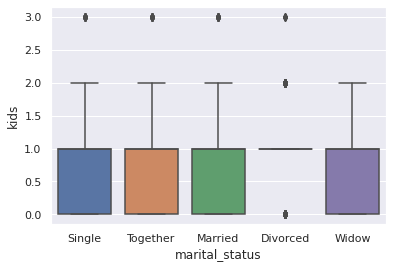

media:  marital_status
Divorced    1.008696
Married     0.967213
Single      0.859539
Together    0.980634
Widow       0.881579
Name: kids, dtype: float64
mediana:  marital_status
Divorced    1.0
Married     1.0
Single      1.0
Together    1.0
Widow       1.0
Name: kids, dtype: float64
minimo:  marital_status
Divorced    0
Married     0
Single      0
Together    0
Widow       0
Name: kids, dtype: int64
maximo:  marital_status
Divorced    3
Married     3
Single      3
Together    3
Widow       2
Name: kids, dtype: int64


In [143]:
sns.boxplot(data= df, x='marital_status', y='kids')
plt.show()

print('media: ', df.groupby('marital_status')['kids'].mean())
print('mediana: ', df.groupby('marital_status')['kids'].median())
print('minimo: ', df.groupby('marital_status')['kids'].min())
print('maximo: ', df.groupby('marital_status')['kids'].max())





In [156]:
df[['marital_status','kids']][df['marital_status'] == 'Divorced']

,marital_status,kids
6,Divorced,1
11,Divorced,0
12,Divorced,2
28,Divorced,0
31,Divorced,2
...,...,...
2158,Divorced,2
2176,Divorced,2
2177,Divorced,1
2179,Divorced,2


In [157]:
df[df.marital_status == 'Divorced'].kids.value_counts()

1    119
0     57
2     49
3      5
Name: kids, dtype: int64

* **As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?** 


In [148]:
df['WithKids'] = np.where(df['kids'] > 0, 'True','False') # criando uma coluna para classificar com filhos(true) e sem filhos(False)
df[['expenses','kids','WithKids']]

,expenses,kids,WithKids
0,1529,0,False
1,21,2,True
2,734,0,False
3,48,1,True
4,407,1,True
...,...,...,...
2200,1094,1,True
2201,436,3,True
2202,1217,0,False
2203,782,1,True


mean: WithKids
False    1041.207006
True      372.237159
Name: expenses, dtype: float64
median: WithKids
False    1106.5
True      181.0
Name: expenses, dtype: float64


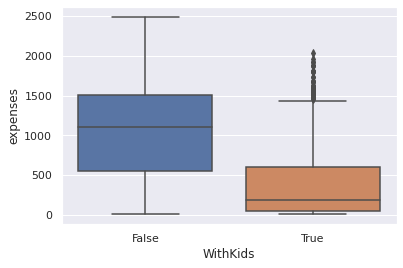

In [151]:
sns.boxplot(data= df, x='WithKids', y='expenses') 
print('mean:',df.groupby('WithKids').expenses.mean()) # media por grupo
print('median:',df.groupby('WithKids').expenses.median()) #mediana por grupo


A média de gastos dos clientes com filhos é menor que aqueles sem filhos

* **Pessoas que têm um maior salário gastam mais?** 

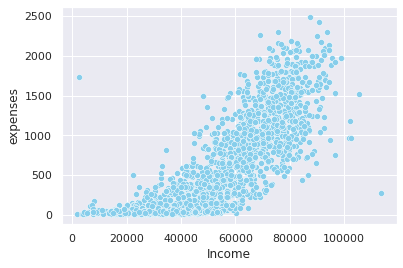

In [160]:
sns.scatterplot(data=df, x='Income',y='expenses',color='skyblue')

In [163]:
df['Income'].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

In [164]:
df['Classe Salario'] = np.where(df['Income'] > 51277,'Alto','Baixo')
df[['Classe Salario', 'expenses']]

,Classe Salario,expenses
0,Alto,1529
1,Baixo,21
2,Alto,734
3,Baixo,48
4,Alto,407
...,...,...
2200,Alto,1094
2201,Alto,436
2202,Alto,1217
2203,Alto,782


mean:  Classe Salario
Alto     991.730734
Baixo    133.409256
Name: expenses, dtype: float64
median:  Classe Salario
Alto     957.0
Baixo     57.5
Name: expenses, dtype: float64


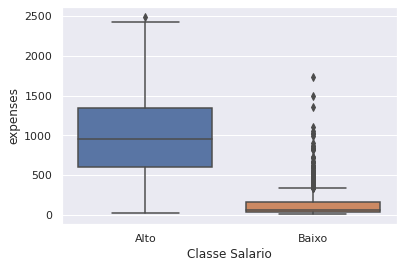

In [167]:
print('mean: ', df.groupby('Classe Salario').expenses.mean())
print('median: ', df.groupby('Classe Salario').expenses.median())
sns.boxplot(data=df, x ='Classe Salario', y= 'expenses')

A variação de gastos dos que tem maiores salários é maior, ou seja mais heterogênea. Enquanto quem ganha menos tem uma variação menor na média de gastos, com excessão de alguns clientes que ganham menos mas gastam muito.
Em média pessoas que ganham mais tende a gastar mais na loja.

## Análise Descritiva Salários

**Tabela de Frequência**

Criando uma tabela de frequência para a variável contínua de salário.

In [30]:
freq = pd.Series(pd.value_counts(
    pd.cut( x = df['Income'], bins = 10, include_lowest = True),
    sort = False ),name= 'frequencia')

In [31]:
freq

(1617.9950000000001, 12930.4]     37
(12930.4, 24130.8]               185
(24130.8, 35331.2]               333
(35331.2, 46531.6]               398
(46531.6, 57732.0]               351
(57732.0, 68932.4]               366
(68932.4, 80132.8]               331
(80132.8, 91333.2]               173
(91333.2, 102533.6]               28
(102533.6, 113734.0]               3
Name: frequencia, dtype: int64

In [32]:
porcent = pd.Series(pd.value_counts(
    pd.cut( x = df['Income'], bins = 10, include_lowest = True),
    sort = False ) / len(df['Income'])* 100, name='Porcentagem')


In [33]:
TabelaFrequencia = pd.DataFrame(data = [freq,porcent])
TabelaFrequencia


,"(1617.9950000000001, 12930.4]","(12930.4, 24130.8]","(24130.8, 35331.2]","(35331.2, 46531.6]","(46531.6, 57732.0]","(57732.0, 68932.4]","(68932.4, 80132.8]","(80132.8, 91333.2]","(91333.2, 102533.6]","(102533.6, 113734.0]"
frequencia,37.000000,185.000000,333.000000,398.000000,351.000000,366.000000,331.000000,173.000000,28.000000,3.000000
Porcentagem,1.678005,8.390023,15.102041,18.049887,15.918367,16.598639,15.011338,7.845805,1.269841,0.136054


In [93]:
TabelaFrequencia.transpose()

,frequencia,Porcentagem
"(1617.9950000000001, 12930.4]",37.0,1.678005
"(12930.4, 24130.8]",185.0,8.390023
"(24130.8, 35331.2]",333.0,15.102041
"(35331.2, 46531.6]",398.0,18.049887
"(46531.6, 57732.0]",351.0,15.918367
"(57732.0, 68932.4]",366.0,16.598639
"(68932.4, 80132.8]",331.0,15.011338
"(80132.8, 91333.2]",173.0,7.845805
"(91333.2, 102533.6]",28.0,1.269841
"(102533.6, 113734.0]",3.0,0.136054


In [34]:
dic = pd.DataFrame( {  'frequencia' : freq,
 'porcentagem' : porcent
    

},
).reset_index(drop=False)
print(dic)


                           index  frequencia  porcentagem
0  (1617.9950000000001, 12930.4]          37     1.678005
1             (12930.4, 24130.8]         185     8.390023
2             (24130.8, 35331.2]         333    15.102041
3             (35331.2, 46531.6]         398    18.049887
4             (46531.6, 57732.0]         351    15.918367
5             (57732.0, 68932.4]         366    16.598639
6             (68932.4, 80132.8]         331    15.011338
7             (80132.8, 91333.2]         173     7.845805
8            (91333.2, 102533.6]          28     1.269841
9           (102533.6, 113734.0]           3     0.136054


In [35]:
dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        10 non-null     category
 1   frequencia   10 non-null     int64   
 2   porcentagem  10 non-null     float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 758.0 bytes


In [36]:
dic['frequencia'].sum()

2205

In [37]:
dic['porcentagem'].sum()

100.0

**Representação de Frequência**


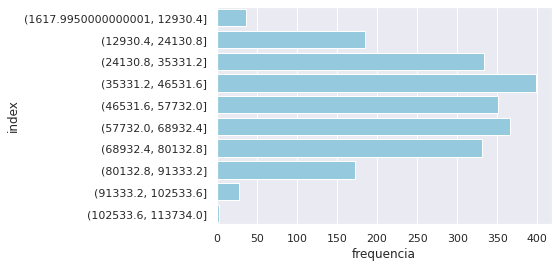

In [38]:
sns.set(style = 'darkgrid')

sns.barplot(data = dic, x = 'frequencia', y = 'index',color = 'skyblue', orient='h')
plt.show()

**Medidas de Tendencia Central**

In [39]:
df['Income'].mean().round(decimals=2) #media

51622.09

In [40]:
df['Income'].median().round(decimals=2) #mediana

51287.0

In [41]:
df['Income'].mode().round(decimals=2) #moda

0    7500.0
dtype: float64

**Medidas de Variabilidade/Dispersão**

In [42]:
Amplitude = df['Income'].max() - df['Income'].min()
Amplitude

112004.0

In [44]:
DesvioMedio = df['Income'].mad().round(decimals=2)
DesvioMedio

17573.27

In [45]:
Variancia = df['Income'].var().round(decimals=2)
Variancia

429031013.05

In [46]:
DesvioPadrao = df['Income'].std().round(decimals=2)
DesvioPadrao

20713.06

In [47]:
CoefVariacao = variation(df['Income']).round(decimals=2)*100
CoefVariacao

40.0

**Quartil**

In [48]:
df['Income'].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

**Medidas de Assimetria**

In [49]:
Skew = df['Income'].skew().round(decimals=2)
Skew

0.01

In [50]:
Curtose = df['Income'].kurtosis().round(decimals=2)
Curtose

-0.85

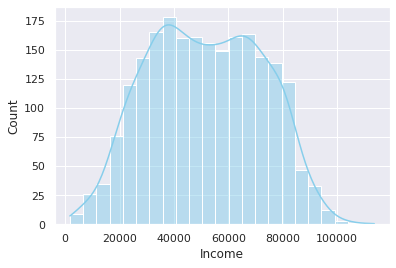

In [51]:
sns.histplot(data=df, x='Income',color='skyblue',kde=True)

**Boxplot**

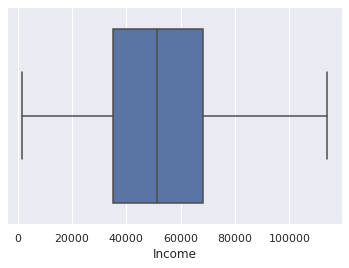

In [52]:
sns.boxplot(data=df, x='Income') 
plt.show()